Chapter 30
# 多项式回归 + 岭回归正则化
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
# 生成随机数据
np.random.seed(0)
num = 30

In [3]:
X = np.random.uniform(0,4,num)
y = np.sin(0.4*np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X,y])

In [4]:
x_array = np.linspace(0,4,101).reshape(-1,1)
degree = 8 # 多项式回归次数
# 将数据扩展为9列
poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X.reshape(-1, 1))
    

$y = -0.985 + 18.400x^1 -71.750x^2 + 122.612x^3 -108.324x^4 + 53.620x^5 -15.058x^6 + 2.243x^7 -0.138x^8$
$y = 0.026 + 3.491x^1 -13.188x^2 + 24.668x^3 -23.210x^4 + 12.008x^5 -3.515x^6 + 0.547x^7 -0.035x^8$
$y = 0.222 + 0.380x^1 + 0.149x^2 + 0.258x^3 -0.391x^4 + 0.203x^5 -0.093x^6 + 0.027x^7 -0.003x^8$
$y = 0.335 + 0.125x^1 + 0.132x^2 + 0.099x^3 + 0.019x^4 -0.048x^5 -0.033x^6 + 0.022x^7 -0.003x^8$
$y = 0.428 + 0.045x^1 + 0.064x^2 + 0.070x^3 + 0.049x^4 -0.008x^5 -0.065x^6 + 0.030x^7 -0.004x^8$
$y = 0.585 + 0.013x^1 + 0.020x^2 + 0.024x^3 + 0.019x^4 -0.004x^5 -0.029x^6 + 0.013x^7 -0.002x^8$


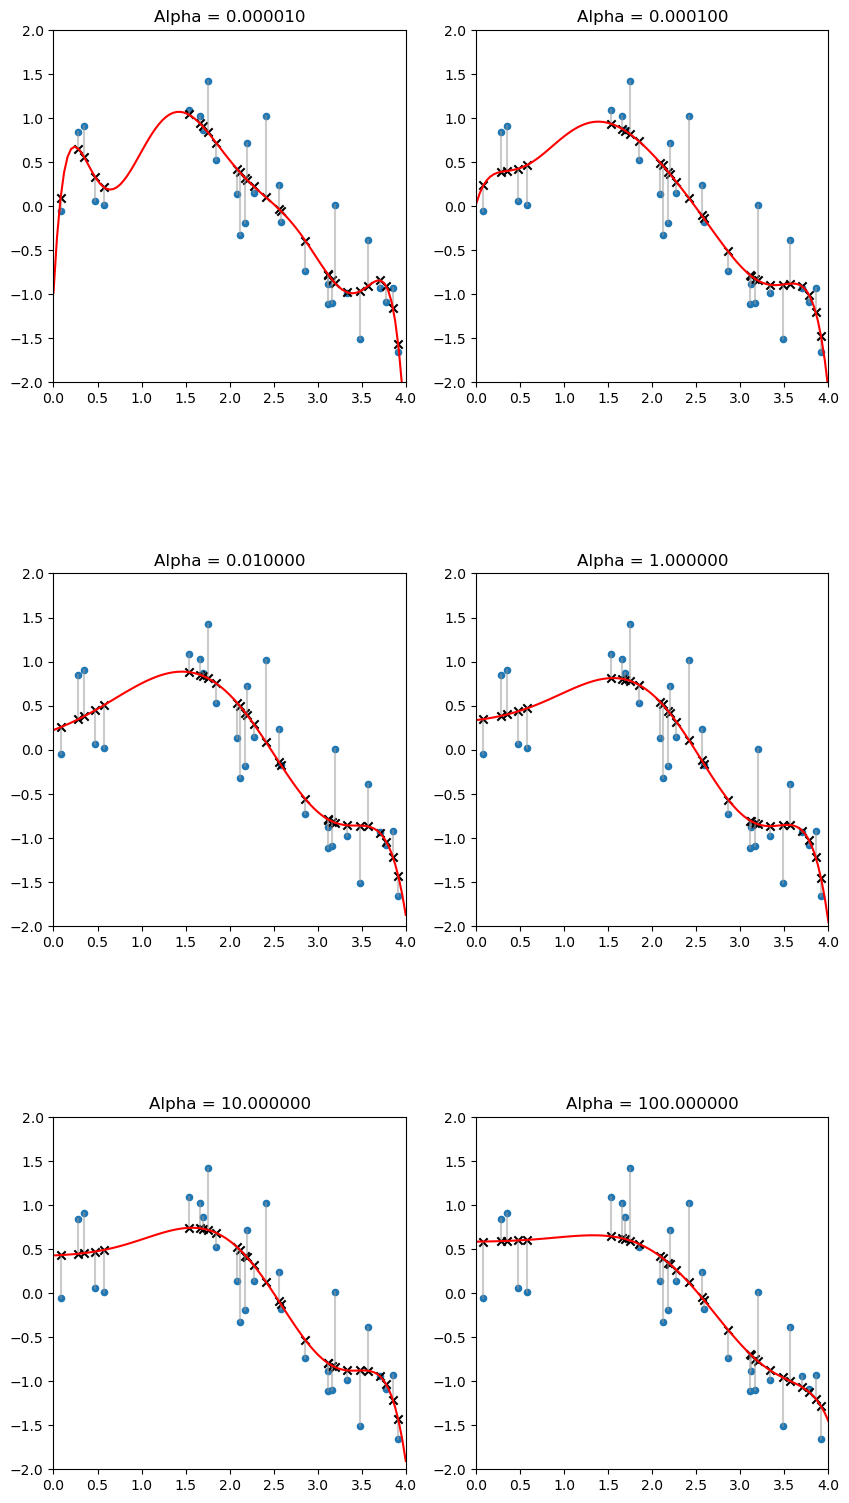

In [5]:
fig, axes = plt.subplots(3,2,figsize=(10,20))
axes = axes.flatten()
# 惩罚因子
alpha_array = [0.00001, 0.0001, 0.01, 1, 10, 100]

for ax, alpha_idx in zip(axes,alpha_array):

    # 训练岭回归模型
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))
    # 预测
    y_array_pred = ridge.predict(poly.fit_transform(x_array))    
    y_poly_pred  = ridge.predict(X_poly)
    data_ = np.column_stack([X,y_poly_pred])
    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker = 'x', color='k')
    # 绘制残差
    ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),
            ([j for (i,j) in data_], [j for (i,j) in data]),
             c=[0.6,0.6,0.6], alpha = 0.5)
    
    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Alpha = %f' % alpha_idx)
    
    # 提取参数
    coef = ridge.coef_[0]; # print(coef)
    intercept = ridge.intercept_[0]; # print(intercept)
    # 回归解析式
    equation = '$y = {:.3f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.3f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")
    print(equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0,4); ax.set_ylim(-2,2); ax.grid(False)

In [8]:
# 多项式回归模型参数随惩罚因子α变化
alphas = np.logspace(4, -2, 100)
degrees = ['Degree = ' + str(d_i) for d_i in range(10)]
colors = plt.cm.jet(np.linspace(0,1,len(degrees)))

In [9]:
coefs = []
for alpha_idx in alphas:
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))
    coefs.append(ridge.coef_[0])
coefs = np.array(coefs)

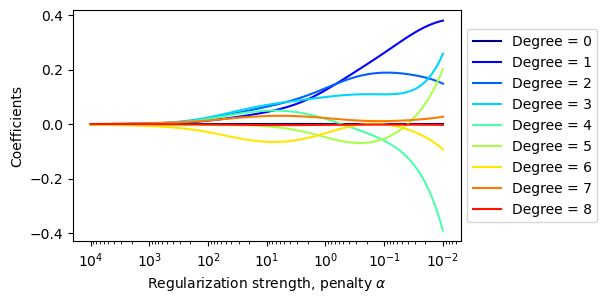

In [10]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(9):
    ax.plot(alphas, coefs[:,idx], color = colors[idx])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) # 调转横轴
ax.set_xlabel(r"Regularization strength, penalty $\alpha$")
ax.set_ylabel("Coefficients")
ax.legend(degrees,loc='center left', bbox_to_anchor=(1, 0.5))